## $\color{orange}{\textbf{Prevendo perdas russas na Guerra da Ucrânia com ML}}$

# $\color{orange}{\textbf{Importando as bibliotecas}}$

In [3]:
"""
1°) Importação do pandas como pd para trabalhar com dados.
"""
import pandas as pd
"""
2°) Importação do numpy como np para trabalhar com matrizes e tudo mais.
"""
import numpy as np
"""
3°) Importação do matplotlib.pyplot como plt para fazer gráficos.
"""
import matplotlib.pyplot as plt
"""
4°) De matplotlib.ticker vamos importar o AutoMinorLocator e o MaxNLocator para trabalhar com os "ticks"
    dos gráficos.
"""
import matplotlib.ticker as mticker
from matplotlib.ticker import AutoMinorLocator, MaxNLocator
"""
5°) De matplotlib.font_manager vamos importar FontProperties para criar fontes de texto.
"""
from matplotlib.font_manager import FontProperties
"""
6°) Importação do seaborn para fazer gráficos
"""
import seaborn as sbn
"""
7°) Importação de pycaret.time_series para trabalhar com séries temporais
"""
from pycaret.time_series import *
"""
8°) Ignorar alguns warnings que não afetam o código
"""
import warnings
warnings.filterwarnings("ignore")

# $\color{orange}{\textbf{Importação dos dados}}$

In [4]:
"""
1°) Importação do dataset que possui as perdas russas em termos de equipamento bélico
"""
losses_equipment = pd.read_csv("russia_losses_equipment_git.csv")
"""
2°) Importação do dataset que possui as perdas russas em termos de tropas
"""
losses_personnel = pd.read_csv("russia_losses_personnel_git.csv")

# $\color{orange}{\textbf{Pré-processamento de dados}}$

In [5]:
"""
Vamos começar concatenando os dois DFs anteriores
"""
"""
1°) Como já vai haver uma coluna de "data" e uma de "dias de guerra" no DF "losses_equipment", 
não faz sentido manter as mesmas no DF "losses_personnel". Além disso, vamos excluir algumas
colunas que não serão usadas no presente trabalho.
"""
losses_personnel.drop(["date", 
                       "day",
                       "personnel*",
                       "POW"], axis = 1, inplace = True)
losses_equipment.drop(["APC", 
                       "field artillery", 
                       "MRL",
                       "fuel tank",
                       "special equipment", 
                       "mobile SRBM system"], axis = 1, inplace = True)
"""
Concatenando os dois DFs anteriores
"""
Dados = pd.concat([losses_equipment, losses_personnel], axis = 1)
"""
Mostrar na tela a parte superior do DF "Dados" com suas 10 colunas
"""
pd.set_option("display.max_columns", 10)
Dados.head()

,date,day,aircraft,helicopter,tank,military auto,drone,naval ship,anti-aircraft warfare,personnel
0,2022-02-25,2,10,7,80,100,0,2,0,2800
1,2022-02-26,3,27,26,146,130,2,2,0,4300
2,2022-02-27,4,27,26,150,130,2,2,0,4500
3,2022-02-28,5,29,29,150,291,3,2,5,5300
4,2022-03-01,6,29,29,198,305,3,2,7,5710


In [6]:
"""
Tranformação da data de object para datetime64[ns]
"""
Dados["date"] = pd.to_datetime(Dados["date"])

# $\color{orange}{\textbf{Dados faltantes}}$

In [7]:
"""
Calcula as porcentagens de dados missing em cada coluna do DF
"""
Dados.isnull().sum()/len(Dados["date"])

date                     0.0
day                      0.0
aircraft                 0.0
helicopter               0.0
tank                     0.0
military auto            0.0
drone                    0.0
naval ship               0.0
anti-aircraft warfare    0.0
personnel                0.0
dtype: float64

In [8]:
Dados.describe()

,day,aircraft,helicopter,tank,military auto,drone,naval ship,anti-aircraft warfare,personnel
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.00000
mean,28.000000,100.584906,103.622642,495.962264,924.509434,53.867925,4.773585,41.339623,14564.45283
std,15.443445,48.798421,40.976178,200.155897,427.232941,50.573267,2.275636,19.206312,4755.46464
min,2.000000,10.000000,7.000000,80.000000,100.000000,0.000000,2.000000,0.000000,2800.00000
25%,15.000000,49.000000,81.000000,335.000000,526.000000,7.000000,3.000000,29.000000,12000.00000
50%,28.000000,101.000000,124.000000,517.000000,1008.000000,42.000000,4.000000,47.000000,15600.00000
75%,41.000000,150.000000,134.000000,676.000000,1322.000000,94.000000,7.000000,55.000000,18500.00000
max,54.000000,167.000000,147.000000,790.000000,1487.000000,155.000000,8.000000,67.000000,20600.00000


# $\color{orange}{\textbf{Análise de dados}}$

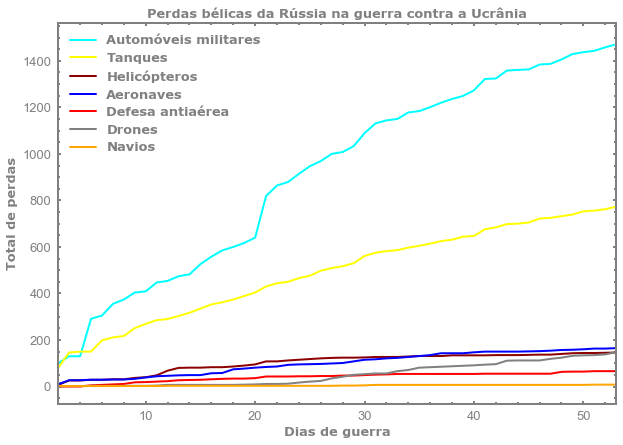

In [9]:
"""
Criação da primeira fonte de texto para colocar como fonte dos labels
"""
font1 = {"family": "Verdana", "weight": "bold", "color": "gray", "size": 13}
"""
Criação da segunda fonte de texto para colocar como fonte da legenda
"""
font2 = FontProperties(family = "Verdana", 
                      weight = "bold",
                      size = 13)
"""
Criando um "local" para alocar a nossa figura
"""
fig, axs = plt.subplots(figsize = (10, 7))
"""
Plot das curvas
"""
axs.plot(Dados["day"], Dados["military auto"], linewidth = 2, label = "Automóveis militares", color = "cyan")
axs.plot(Dados["day"], Dados["tank"], linewidth = 2, label = "Tanques", color = "yellow")
axs.plot(Dados["day"], Dados["helicopter"], linewidth = 2, label = "Helicópteros", color = "darkred")
axs.plot(Dados["day"], Dados["aircraft"], linewidth = 2, label = "Aeronaves", color = "blue")
axs.plot(Dados["day"], Dados["anti-aircraft warfare"], linewidth = 2, label = "Defesa antiaérea", color = "red")
axs.plot(Dados["day"], Dados["drone"], linewidth = 2, label = "Drones", color = "gray")
axs.plot(Dados["day"], Dados["naval ship"], linewidth = 2, label = "Navios", color = "orange")
"""
Grid = False
"""
axs.grid(False)
"""
Definindo a "grossura" e a cor do eixos
"""
for axis in ["left", "top", "right", "bottom"]:
    axs.spines[axis].set_linewidth(2)
    axs.spines[axis].set_color("gray")
"""
Trabalha com os ticks do gráfico
"""        
axs.xaxis.set_minor_locator(AutoMinorLocator())
axs.yaxis.set_minor_locator(AutoMinorLocator())
axs.tick_params(axis = "both", direction = "in", labelcolor = "gray", labelsize = 13, top = True, right = True, left = True, bottom = True)
axs.tick_params(which='minor', direction = "in", length=2, color='gray', width = 2, top = True, right = True, left = True, bottom = True)
axs.tick_params(which='major', direction = "in", color='gray', length=3.4, width = 2, top = True, right = True, left = True, bottom = True)
"""
Definindo um intervalo para o eixo x do gráfico
"""
plt.xlim(2, 53)
"""
Legenda da figura
"""
plt.legend(frameon = False, prop = font2, labelcolor = "gray")
"""
Tudo em negrito
"""
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
"""
Labels
"""
axs.set_xlabel("Dias de guerra", fontdict = font1)
axs.set_ylabel("Total de perdas", fontdict = font1)
"""
Fundo branco
"""
fig.patch.set_facecolor("white")
"""
Título da figura
"""
axs.set_title("Perdas bélicas da Rússia na guerra contra a Ucrânia", fontdict = font1)
plt.show()

In [10]:
Lista_de_perdas_para_cada_equipamento = []
Lista_de_equipamentos = ["Aeronaves", "Helicópteros", "Tanques", "Automóveis militares", "Drones", "Navios", "Defesa antiaérea"]
for c in ["aircraft", "helicopter", "tank", "military auto", "drone", "naval ship", "anti-aircraft warfare"]:
    S = 0 # Variável soma  
    for i in Dados[c]:
        S = S + i
    Lista_de_perdas_para_cada_equipamento.append(S)

findfont: Font family ['verbose'] not found. Falling back to DejaVu Sans.


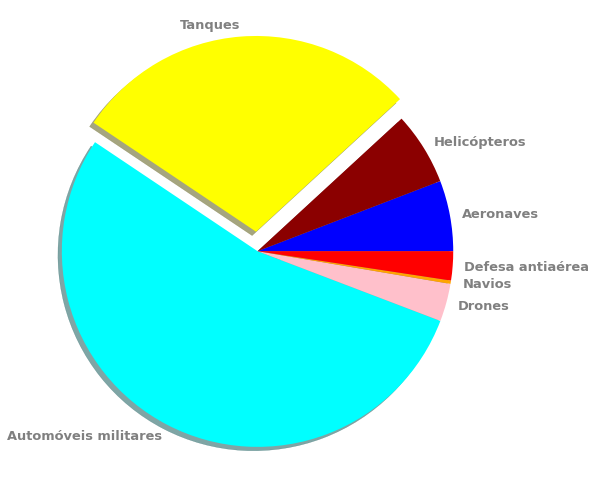

In [11]:
fig, axs = plt.subplots(figsize = (10, 9))
"""
Plot de um gráfico do tipo pizza
"""
axs.pie(x = Lista_de_perdas_para_cada_equipamento, 
        labels = Lista_de_equipamentos, 
        shadow = True, 
        explode = [0, 0, 0.1, 0, 0, 0, 0], # Lista de seprações entre os "pedaços da pizza"
        textprops={"family": "verbose", 
                   "weight": "bold", 
                   "color" :"gray", 
                   'fontsize': 13}, 
        colors = ["blue", "darkred", "yellow", "cyan", "pink", "orange", "red"],
        labeldistance = 1.06) # Distância dos labels ao centro da pizza
fig.patch.set_facecolor("white")
plt.show() 

$\color{orange}{\textbf{Em termos bélicos, o que a Russia mais perde são automóveis militares e tanques de guerra.}}$

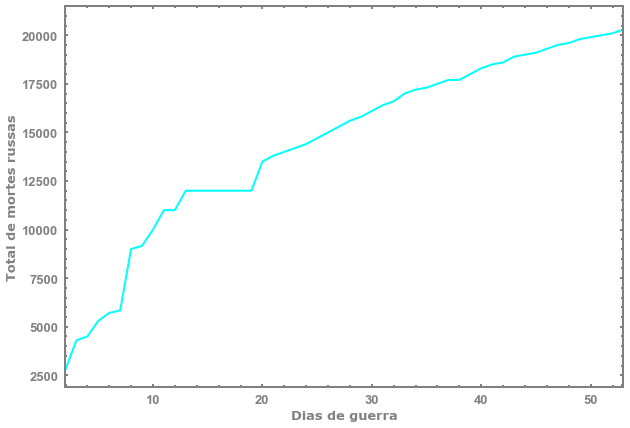

In [12]:
fig, axs = plt.subplots(figsize = (10, 7))
axs.plot(Dados["day"], Dados["personnel"], linewidth = 2, color = "cyan")
axs.grid(False)
for axis in ["left", "top", "right", "bottom"]:
    axs.spines[axis].set_linewidth(2)
    axs.spines[axis].set_color("gray")
axs.xaxis.set_minor_locator(AutoMinorLocator())
axs.yaxis.set_minor_locator(AutoMinorLocator())
axs.tick_params(axis = "both", direction = "in", labelcolor = "gray", labelsize = 13, top = True, right = True, left = True, bottom = True)
axs.tick_params(which='minor', direction = "in", length=2, color='gray', width = 2, top = True, right = True, left = True, bottom = True)
axs.tick_params(which='major', direction = "in", color='gray', length=3.4, width = 2, top = True, right = True, left = True, bottom = True)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.xlim(2, 53)
axs.set_xlabel("Dias de guerra", fontdict = font1)
axs.set_ylabel("Total de mortes russas", fontdict = font1)
fig.patch.set_facecolor("white")
plt.show()                      

$\color{orange}{\textbf{Muitos russos foram mortos e, pelo andar crescente do gráfico, vem mais por aí...}}$

# $\color{orange}{\textbf{Preparação dos dados para a aplicação do PyCaret}}$

In [13]:
"""
Definindo vários DFs apenas com a data e uma variável. 
"""
aeronaves = Dados[["date", "aircraft"]]              
helicopteros = Dados[["date", "helicopter"]]              
tanques = Dados[["date", "tank"]]                    
automoveis_militares = Dados[["date", "military auto"]]             
pessoas = Dados[["date", "personnel"]]               

In [14]:
"""
Transformando a data em índices
"""
aeronaves.set_index("date", drop = True, inplace = True)           
helicopteros.set_index("date", drop = True, inplace = True)             
tanques.set_index("date", drop = True, inplace = True)                   
automoveis_militares.set_index("date", drop = True, inplace = True)          
pessoas.set_index("date", drop = True, inplace = True)